In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from collections import Counter

In [4]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [5]:
TLC_df_final = pd.read_csv('data\\TLC_df_final.csv')

In [6]:
TLC_df_final.head()

,Unnamed: 0,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,zip_3,zip_2,credit_hist,fico_avg_score,inst_amnt_ratio
0,0,3600.0,3600.0,1,13.99,5,21,10.0,4,55000.0,0,0,2,5.91,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,190,19,4505.0,677.0,0.034175
1,1,24700.0,24700.0,1,11.99,5,24,10.0,4,65000.0,0,0,11,16.06,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,577,57,5844.0,717.0,0.033210
2,4,10400.0,10400.0,2,22.45,2,9,3.0,4,104433.0,2,0,6,25.37,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,174,17,6392.0,697.0,0.027876
3,5,11950.0,11950.0,1,13.44,5,22,4.0,3,34000.0,2,0,2,10.20,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,300,30,10288.0,692.0,0.033906
4,6,20000.0,20000.0,1,9.17,6,28,10.0,4,180000.0,0,0,2,14.67,12.0,0.0,87329.0,84.5,27.0,4.0,0.0,550,55,9314.0,682.0,0.031879


In [7]:
TLC_df_final.dtypes

Unnamed: 0                int64
loan_amnt               float64
funded_amnt             float64
term                      int64
int_rate                float64
grade                     int64
sub_grade                 int64
emp_length              float64
home_ownership            int64
annual_inc              float64
verification_status       int64
loan_status               int64
purpose                   int64
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
mort_acc                float64
pub_rec_bankruptcies    float64
zip_3                     int64
zip_2                     int64
credit_hist             float64
fico_avg_score          float64
inst_amnt_ratio         float64
dtype: object

In [9]:
target = 'loan_status'


X = TLC_df_final.drop(columns=[target,'zip_3','zip_2','Unnamed: 0'], axis=1)
y = TLC_df_final[target]

In [10]:
X.head()

,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,credit_hist,fico_avg_score,inst_amnt_ratio
0,3600.0,3600.0,1,13.99,5,21,10.0,4,55000.0,0,2,5.91,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,4505.0,677.0,0.034175
1,24700.0,24700.0,1,11.99,5,24,10.0,4,65000.0,0,11,16.06,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,5844.0,717.0,0.033210
2,10400.0,10400.0,2,22.45,2,9,3.0,4,104433.0,2,6,25.37,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,6392.0,697.0,0.027876
3,11950.0,11950.0,1,13.44,5,22,4.0,3,34000.0,2,2,10.20,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,10288.0,692.0,0.033906
4,20000.0,20000.0,1,9.17,6,28,10.0,4,180000.0,0,2,14.67,12.0,0.0,87329.0,84.5,27.0,4.0,0.0,9314.0,682.0,0.031879


In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=11)

In [12]:
y_train.head()

80245      0
70177      0
760935     0
325461     1
1267091    0
Name: loan_status, dtype: int64

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfpvalue= pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfpvalue,dfscores],axis=1)
featureScores.columns = ['Attributes','pvalue','Score']  #naming the dataframe columns
print(featureScores.nlargest(22,'Score'))  #print 10 best features

              Attributes         pvalue         Score
5              sub_grade   0.000000e+00  72122.770221
3               int_rate   0.000000e+00  68818.566070
4                  grade   0.000000e+00  68511.161714
2                   term   0.000000e+00  32335.687363
20        fico_avg_score   0.000000e+00  15642.628385
11                   dti   0.000000e+00  10373.687018
17              mort_acc   0.000000e+00   6005.595431
1            funded_amnt   0.000000e+00   4813.403448
0              loan_amnt   0.000000e+00   4813.328749
9    verification_status   0.000000e+00   3478.186425
15            revol_util   0.000000e+00   2714.775804
21       inst_amnt_ratio   0.000000e+00   2536.125174
7         home_ownership   0.000000e+00   2168.099763
8             annual_inc  3.660959e-274   1252.496350
19           credit_hist  4.068612e-258   1178.564660
6             emp_length  2.117989e-190    866.675629
12              open_acc  6.508348e-157    712.521524
13               pub_rec  9.

In [15]:
drop_columns=['pub_rec','pub_rec_bankruptcies','purpose','revol_bal','total_acc','funded_amnt']

In [16]:
X_train=X_train.drop(columns=drop_columns)
X_test =X_test.drop(columns=drop_columns)

In [17]:
X_train.shape,X_test.shape

((911370, 16), (390588, 16))

In [18]:
#ROC dict for TPR and FPR values
roc_dict = {}
#precision recall curve
prc_dict = {}

def modify_roc_dict(clf, y_test, X_test, name ,dict_modify):
    """
    This function modifies a dictionary in place and adds keys for ROC metrics
    """
    
    fpr, tpr, thresholds = roc_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    
    
    clf_roc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
    
    dict_modify[name] = clf_roc_dict
    
def modify_prc_dict(clf, y_test, X_test, name ,dict_modify):
    """
    This function modifies a dictionary in place and adds keys for precision recall metrics
    """
    
    precision, recall, thresholds = precision_recall_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    
    clf_prc_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    
    dict_modify[name] = clf_prc_dict

In [19]:
def fit_score_clf(clf, X_train, y_train, X_test, y_test, name='clf'):
    """
    fits a classifer from sklearn and returns a dataframe
    clf(sklearn): classifier
    X_train(numpy): train features
    y_train(numpy): predictions row vector
    X_test(numpy): test features
    y_test(numpy): ground truth row vector
    name(string): name of classifier
    
    """
    #fit to train data
    clf.fit(X_train, y_train)
    #make predictions
    y_pred = clf.predict(X_test)
    #make dataframe from report
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    #add clf name as column
    clf_report['clf'] = name
    
    return clf_report

In [33]:
#instantiate with default params
lr  = LogisticRegression(penalty='l2',
                         C=1.0,
                         solver = 'lbfgs',
                         max_iter=400,
                         n_jobs=-1)

lr_report = fit_score_clf(lr, X_train, y_train, X_test, y_test, name='lr')
lr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.791344,0.512658,0.782213,0.652001,0.730419,lr
recall,0.979564,0.076837,0.782213,0.528200,0.782213,lr
f1-score,0.875452,0.133643,0.782213,0.504547,0.713280,lr
support,305199.000000,85389.000000,0.782213,390588.000000,390588.000000,lr


In [34]:
#metrics for lr
modify_roc_dict(clf=lr,
                y_test=y_test,
                X_test=X_test,
                name='Logistic Regression', 
                dict_modify=roc_dict)
modify_prc_dict(clf=lr,
                y_test=y_test,
                X_test=X_test,
                name='Logistic Regression',
                dict_modify=prc_dict)

In [35]:
gbtree = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 100)

gbtree_report = fit_score_clf(gbtree, X_train, y_train, X_test, y_test, name='gbtree')
gbtree_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.794254,0.564776,0.786028,0.679515,0.744087,gbtree
recall,0.980033,0.092611,0.786028,0.536322,0.786028,gbtree
f1-score,0.877417,0.159129,0.786028,0.518273,0.720388,gbtree
support,305199.000000,85389.000000,0.786028,390588.000000,390588.000000,gbtree


In [36]:
#metrics for gbtree
modify_roc_dict(gbtree, y_test, X_test, name='GBTree',dict_modify=roc_dict)


modify_prc_dict(clf=gbtree,
                y_test=y_test,
                X_test=X_test,
                name='GBTree',
                dict_modify=prc_dict)

In [37]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

rf_report = fit_score_clf(rf, X_train, y_train, X_test, y_test, name='rf')
rf_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.797779,0.530585,0.784438,0.664182,0.739366,rf
recall,0.970003,0.121187,0.784438,0.545595,0.784438,rf
f1-score,0.875502,0.197308,0.784438,0.536405,0.727238,rf
support,305199.000000,85389.000000,0.784438,390588.000000,390588.000000,rf


In [39]:
#metrics for random forest
modify_roc_dict(rf, y_test, X_test, name='RandomForest',dict_modify=roc_dict)

modify_prc_dict(clf=rf,
                y_test=y_test,
                X_test=X_test,
                name='RandomForest',
                dict_modify=prc_dict)

In [40]:
xgb_clf = xgb.XGBClassifier(n_estimators=300,
                     subsample=0.9,
                            n_jobs=-1)
xgb_report = fit_score_clf(xgb_clf, X_train, y_train, X_test, y_test, name='xgb')
xgb_report.head()

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,0,1,accuracy,macro avg,weighted avg,clf
precision,0.799702,0.541458,0.785836,0.670580,0.743246,xgb
recall,0.968489,0.132991,0.785836,0.550740,0.785836,xgb
f1-score,0.876040,0.213535,0.785836,0.544787,0.731205,xgb
support,305199.000000,85389.000000,0.785836,390588.000000,390588.000000,xgb


In [41]:
#metrics for xgb
modify_roc_dict(xgb_clf, y_test, X_test, name='XGBoost',dict_modify=roc_dict)

modify_prc_dict(clf=xgb_clf,
                y_test=y_test,
                X_test=X_test,
                name='XGBoost',
                dict_modify=prc_dict)

In [42]:
#put hard limit on iterations to save time in exploration phase
svc = SVC(C=1.0, kernel='rbf',
          gamma='auto', 
          probability=True,
          max_iter=400)

svc_report = fit_score_clf(svc, X_train, y_train, X_test, y_test, name='svc')
svc_report.head()

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


,0,1,accuracy,macro avg,weighted avg,clf
precision,0.789383,0.218652,0.221184,0.504017,0.664611,svc
recall,0.004482,0.995725,0.221184,0.500104,0.221184,svc
f1-score,0.008914,0.358566,0.221184,0.183740,0.085354,svc
support,305199.000000,85389.000000,0.221184,390588.000000,390588.000000,svc


In [43]:
#metrics for svc
modify_roc_dict(svc, y_test, X_test, name='SVC',dict_modify=roc_dict)

modify_prc_dict(clf=svc,
                y_test=y_test,
                X_test=X_test,
                name='SVC',
                dict_modify=prc_dict)

In [44]:
knn = KNeighborsClassifier(n_neighbors =5, n_jobs=-1)

knn_report = fit_score_clf(knn, X_train, y_train, X_test, y_test, name='KNN')
knn_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.787082,0.277713,0.742283,0.532398,0.675726,KNN
recall,0.918702,0.111724,0.742283,0.515213,0.742283,KNN
f1-score,0.847814,0.159344,0.742283,0.503579,0.697303,KNN
support,305199.000000,85389.000000,0.742283,390588.000000,390588.000000,KNN


In [45]:
#metrics for knn
modify_roc_dict(knn, y_test, X_test, name='KNN',dict_modify=roc_dict)

modify_prc_dict(clf=knn,
                y_test=y_test,
                X_test=X_test,
                name='knn',
                dict_modify=prc_dict)

In [41]:
#see keys we have
roc_dict.keys()

dict_keys(['Logistic Regression', 'GBTree', 'RandomForest', 'XGBoost', 'SVC', 'KNN'])

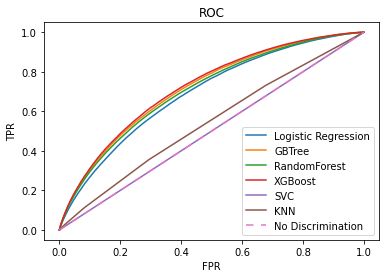

In [46]:
import os
for key in roc_dict:
    clf = roc_dict[key]
    plt.plot(clf['fpr'], clf['tpr'], label=key)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(5, 5))
plt.savefig(os.path.join('roc_curve_all_models.png'))
plt.legend()
plt.show()

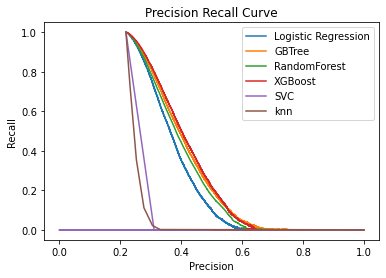

In [47]:
for key in prc_dict:
    clf = prc_dict[key]
    plt.plot(clf['precision'], clf['recall'], label=key)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.savefig(os.path.join('prc_curve_all_models.png'))

plt.legend()

plt.show()

In [48]:
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf = xgb.XGBClassifier(n_estimators=300,
                            subsample=0.9,
                            n_jobs=-1,
                           scale_pos_weight=estimate)

clf.fit(X_train, y_train)



Estimate: 3.551


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:33:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


NameError: name 'confusion_matrix' is not defined

In [50]:
#define location to save trained model
save_model_dir = os.path.join('models\\xgb_default_params.pkl')
print("Saving model at: {}".format(save_model_dir))

#save the model
with open(save_model_dir, 'wb') as handle:
    pickle.dump(xgb_clf,
                handle,
                protocol=pickle.HIGHEST_PROTOCOL)

Saving model at: models\xgb_default_params.pkl


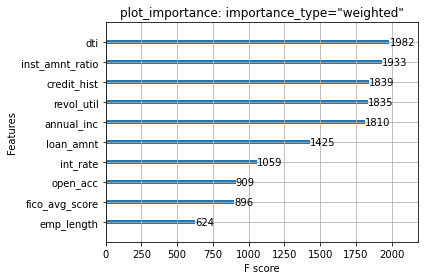

In [51]:
#”weight” is the number of times a feature appears in a tree
xgb.plot_importance(xgb_clf, 
                    importance_type='weight',
                    max_num_features=10, 
                    title='plot_importance: importance_type="weighted"')
plt.tight_layout()
plt.show()

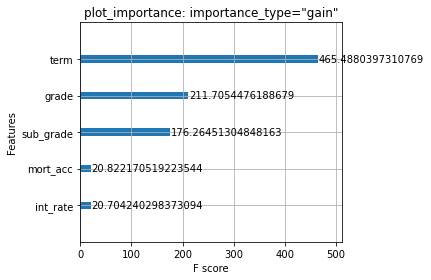

In [52]:
#”gain” is the average gain of splits which use the feature

xgb.plot_importance(xgb_clf, 
                    importance_type='gain',
                    max_num_features=5, 
                    title='plot_importance: importance_type="gain"')
plt.tight_layout()
plt.show()

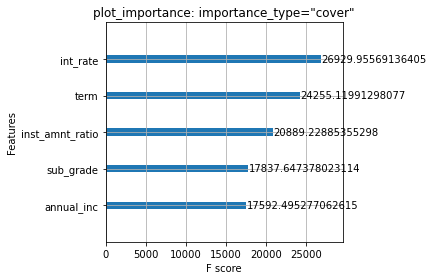

In [53]:
#is the average coverage of splits which use the feature 
#where coverage is defined as the number of samples affected by the split

xgb.plot_importance(xgb_clf, 
                    importance_type='cover',
                    max_num_features=5, 
                    title='plot_importance: importance_type="cover"')
plt.tight_layout()
plt.show()

In [54]:
y_pred=xgb_clf.predict(X_test)
y_prob=xgb_clf.predict_proba(X_test)

In [57]:
y_prob=y_prob[:, 1] #keeping only positive outcomes

In [58]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred))

[[295582   9617]
 [ 74033  11356]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88    305199
           1       0.54      0.13      0.21     85389

    accuracy                           0.79    390588
   macro avg       0.67      0.55      0.54    390588
weighted avg       0.74      0.79      0.73    390588



In [59]:
# calculate AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC: %.3f' % auc)

AUC: 0.721
